## Author : Riasad Alvi 
### 10 Jan 2025

from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [194]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

    n_samples=100: Creates 100 data points (samples).
    n_features=1: Each sample has 1 feature (independent variable).
    n_informative=1: Only 1 feature is useful to predict the target (dependent variable).
    n_targets=1: The target variable is a single continuous value.
    noise=20: Adds Gaussian noise with a standard deviation of 20 to make the data less perfect (more realistic).
    random_state=13: Ensures reproducibility by fixing the random seed.
    The variables X (features) and y (target) hold the generated data.

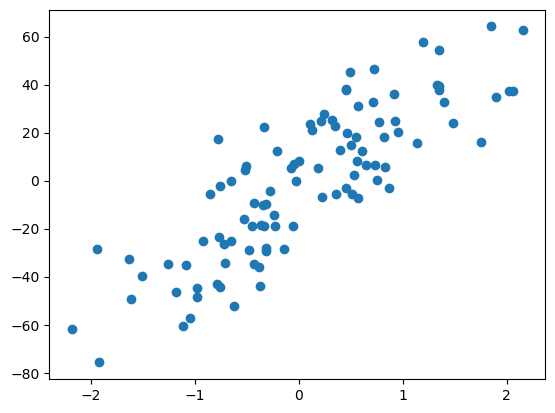

In [197]:
plt.scatter(X,y)

In [199]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

    X and y: The features and target data to be split.
    test_size=0.2: Reserves 20% of the data for testing and uses 80% for training.
    random_state=2: Ensures reproducibility by fixing the random seed.

After this:

    X_train and y_train contain the training data (80%).
    X_test and y_test contain the testing data (20%).

In [202]:
from sklearn.linear_model import LinearRegression

In [204]:
lr = LinearRegression()

In [206]:
# actual value of m and b : 
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.2710144261783825


In [208]:
# accuracy : 
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

## My own Gradient Regressor function : 

In [211]:
class GDRegressor2:
    
    def __init__(self, learning_rate, epochs):
        self.m = 100  # Starting from a random value of m
        self.b = -120  # Starting from a random value of b
        self.lr = learning_rate  # Learning rate given by the user
        self.epochs = epochs  # Number of epochs given by the user
        
    def fit(self, X, y):
        # Calculate `m` and `b` using gradient descent
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(y - self.m * X.ravel() - self.b)  # Gradient for b
            loss_slope_m = -2 * np.sum((y - self.m * X.ravel() - self.b) * X.ravel())  # Gradient for m
            
            # Update b and m
            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)  
            
        print(self.m, self.b)  # Print final values of m and b

    def predict(self, X):
        return self.m * X + self.b


This code defines a custom linear regression model using **Gradient Descent**. Here's what each part does:

### Class: `GDRegressor2`
A simple implementation of a linear regression model with manual gradient descent.

---

### **`__init__` Method**
- Initializes the model with:
  - **`m`** (slope) starting at 100.
  - **`b`** (intercept) starting at -120.
  - **`learning_rate` (lr)**: The rate at which the model updates parameters.
  - **`epochs`**: Number of iterations for training.

---

### **`fit` Method**
- Trains the model by:
  1. Calculating the gradients of the **loss function** (mean squared error) with respect to `m` and `b`:
   - `loss_slope_b`: Gradient for `b`.
   - `loss_slope_m`: Gradient for `m`.
  2. Updating `m` and `b` using the gradients and learning rate.
  3. Repeats this process for the specified number of `epochs`.

- Prints the final values of `m` and `b` after training.

---

### **`predict` Method**
- Makes predictions using the formula:
  \[
  \hat{y} = mX + b
  \]

---

### Summary
This class implements linear regression manually, using gradient descent to optimize the parameters (`m` and `b`). It can:
- Learn the best-fit line using `fit(X, y)`.
- Make predictions using `predict(X)`.

In [214]:
gd = GDRegressor2(0.001,500)

This code creates an instance of the `GDRegressor2` class, initializing the gradient descent-based linear regression model with the following parameters:

- **`learning_rate=0.001`**: The model will adjust the parameters (`m` and `b`) slowly in each step to ensure stable convergence.
- **`epochs=500`**: The model will iterate 500 times to optimize `m` and `b` using gradient descent.

Now, the `gd` object is ready to be trained on data using the `fit(X, y)` method.

In [217]:
gd.fit(X_train,y_train)

28.12597331513562 -2.2710144261783833


This code trains the `GDRegressor2` model on the training data:

- **`X_train`**: The training features (independent variable).
- **`y_train`**: The training target values (dependent variable).

During training:
1. The model computes gradients for the slope (`m`) and intercept (`b`) based on the training data and updates their values using gradient descent.
2. This process repeats for 500 epochs (as specified during initialization).

At the end of training, the final values of `m` (slope) and `b` (intercept) are printed, representing the best-fit line learned by the model.

In [220]:
# accuracy : 
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

In [224]:
# y^ =mX+b
#It returns the predicted values based on the given input features X.
gd.predict(X)


array([[-22.30769518],
       [-14.56616147],
       [-15.03324179],
       [ 24.52827391],
       [  4.41896879],
       [ 21.9513937 ],
       [ -9.11480209],
       [  2.93077044],
       [-22.549832  ],
       [-14.36228828],
       [ 54.40903272],
       [  8.90178452],
       [  3.57356433],
       [ -8.8082183 ],
       [-23.8893975 ],
       [ 10.47451264],
       [ 15.72634513],
       [  7.84118132],
       [-47.6974979 ],
       [ 46.92811348],
       [-24.46209869],
       [-16.670531  ],
       [-28.38134621],
       [ 58.21059953],
       [ -8.10292651],
       [-48.37211197],
       [-11.79498241],
       [-11.33105581],
       [-15.81005402],
       [-16.98551717],
       [ 18.03495551],
       [ 19.27097931],
       [ 10.48358121],
       [-37.75490958],
       [-63.78576024],
       [-35.61207222],
       [  3.84502514],
       [ 35.14544387],
       [-32.84905484],
       [ 13.54314331],
       [-44.82125577],
       [ -2.3382081 ],
       [-10.09381842],
       [ 10